In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<h3> (1) Sampling from distributions </h3>

(a) Exponential Distribution

We define a utility function to sample from the Exponential Distribution given the parameter lambda.


In [5]:
def getExp(lam = 1, size = 10000):
    us = np.random.uniform(0,1,size)
    exp = -np.log(us)/lam
    return exp 

Then, we simulated 10000 values using λ = 2 and plotted them using an histogram, along with the
analytical probability density function.

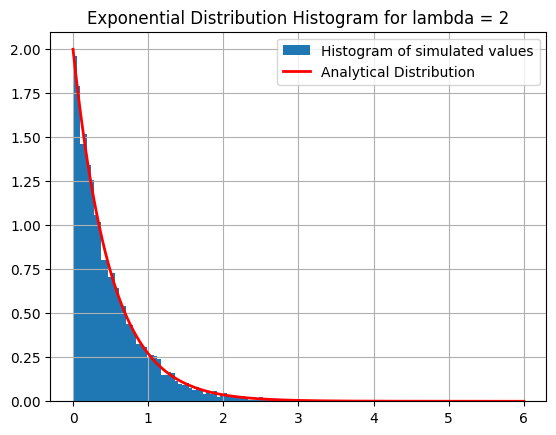

In [6]:
lam = 2
exp = getExp(lam)
x = np.linspace(0,6, num = 10000)
plt.figure()
plt.hist(exp, bins = 100, density=True, label = 'Histogram of simulated values')
plt.plot(x,lam*np.exp(-lam*x), color = 'red', linewidth = '2', label = 'Analytical Distribution')
plt.plot()
plt.title('Exponential Distribution Histogram for lambda = 2')
plt.legend()
plt.grid()
plt.show()

The visual results are satisfactory, but we also performed tests for distribution type: we used
Kolmogorov Smirnov test to collect a list of p-values that we then plotted using an histogram,
noting how they seem to be uniformly distributed between 0 and 1. This suggests
therefore that our generator indeed samples values from the desired distribution.

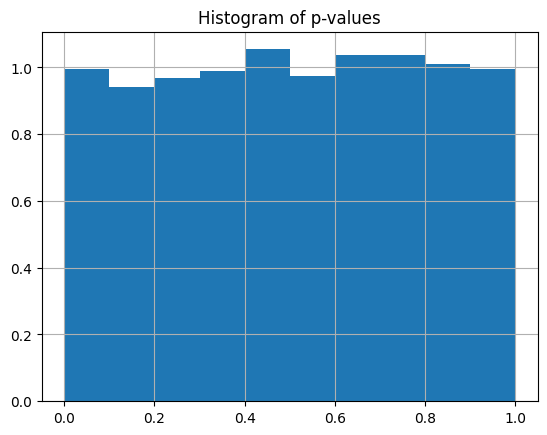

In [7]:
lam = 2
p = []
for i in range(10000):
    exp = getExp(lam)
    p.append(stats.kstest(exp, cdf = (lambda x: 1 - np.exp(-lam*x)))[1])

plt.figure()
plt.hist(p, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

(b) Normal Distribution

We define a utility function to sample from the Normal Distribution using the Box Muller method.

In [8]:
def getNorm(size = 10000):
    u1 = np.random.uniform(0,1,size//2)
    u2 = np.random.uniform(0,1,size//2)
    k = np.sqrt(-2*np.log(u1))
    z1 = k * np.cos(2*np.pi*u2)
    z2 = k * np.sin(2*np.pi*u2)
    z = np.append(z1, z2)
    return z

Again, we sampled 10000 values using the above function and we visually inspected the results
with an histogram.

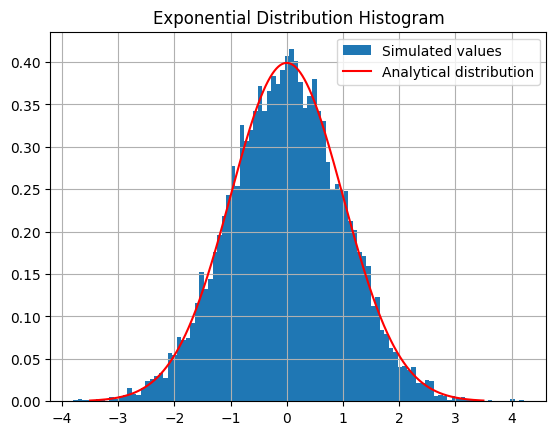

In [9]:
vals = getNorm()
x = np.linspace(-3.5,3.5, num = 10000)
plt.figure()
plt.hist(vals, bins = 100, density=True, label = 'Simulated values')
plt.plot(x, stats.norm.pdf(x, 0, 1), color = 'red', label = 'Analytical distribution')
plt.plot()
plt.title('Exponential Distribution Histogram')
plt.legend()
plt.grid()
plt.show()

We performed Kolmogorov Smirnov tests to check if our hypothesis (i.e., the sampled values
follow a normal distribution) is respected, generating a set of p-values and seeing that they are
uniformly distributed between 0 and 1: therefore, we can not reject our hypothesis
and we have strong suggestion that indeed we are sampling from the normal distribution.

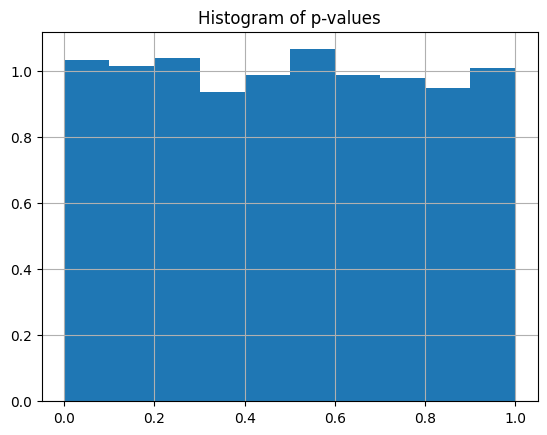

In [10]:
p = []
for i in range(10000):
    vals = getNorm(lam)
    p.append(stats.kstest(vals, cdf = 'norm')[1])

plt.figure()
plt.hist(p, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

(c) Pareto

We implemented a function allowing us to generate values from the Pareto distribution, given
the various parameters (with support on [0, ∞[)

In [11]:
def getPar(k, beta = 1, size = 10000):
    us = np.random.uniform(0, 1, size)
    par = beta*(us**(-1/k)-1)
    return par

We generated simulated values from the above code experimenting with various values of the
first parameter k, as presented in the figure below, along with the real probability density function.

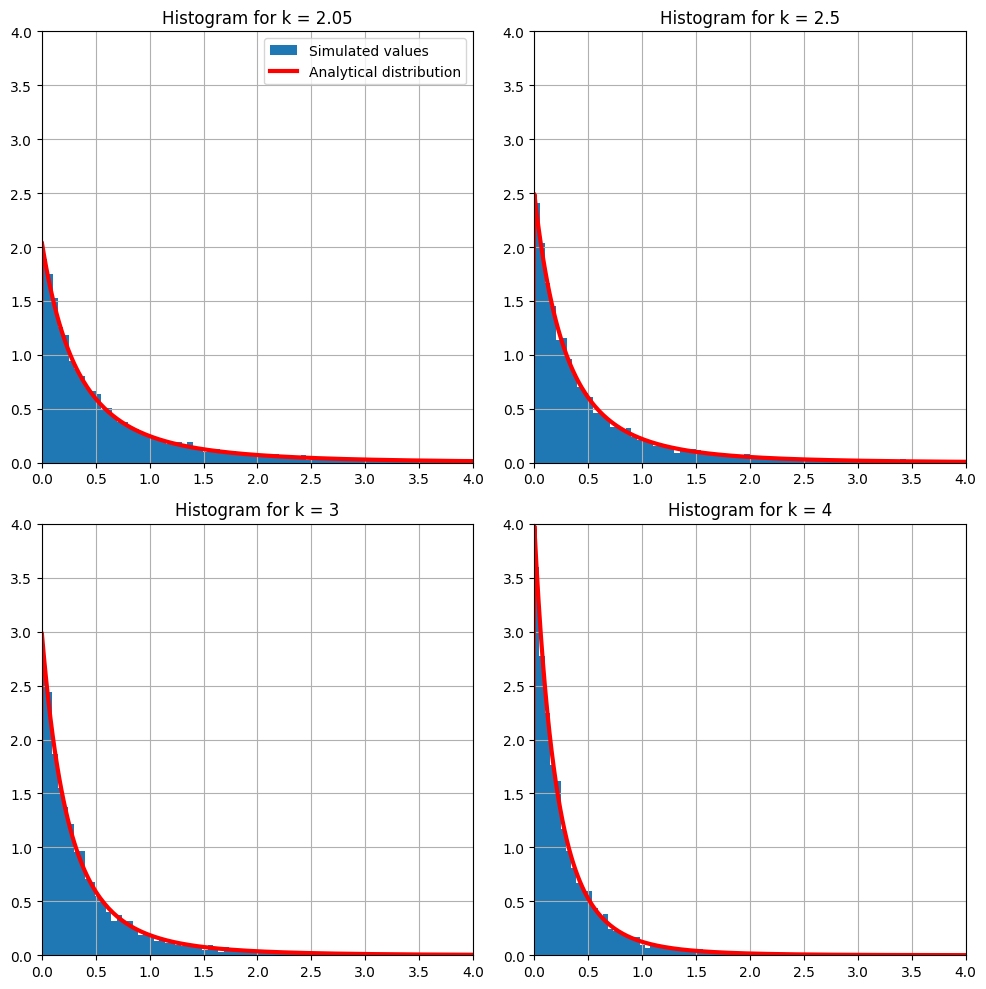

In [12]:
ks = [2.05, 2.5, 3, 4]

fig, axs = plt.subplots(2,2, figsize = (10,10))
axs = axs.flatten()

for i, k in enumerate(ks):
    vals = getPar(k)
    vals_display = vals[vals<5] #for visualization purposes
    axs[i].hist(vals_display, bins = 100, density = True, label = 'Simulated values')
    x = np.linspace(0,20,1000)
    axs[i].plot(x-1, stats.pareto.pdf(x, k), color = 'red', linewidth = '3', label = 'Analytical distribution')
    axs[i].set_title('Histogram for k = {}'.format(k))
    axs[i].set_xlim([0,4])
    axs[i].set_ylim([0,4])
    axs[i].set_aspect('equal', 'box')
    axs[i].grid()

axs[0].legend()
fig.tight_layout()

As for the exponential and normal distributions, we performed Kolomogorov Smirnov tests on
the sampled values to confirm the hypothesis that they follow correctly the Pareto distribution,
observing how the generated p-values follow the uniform distribution between 0 and 1.

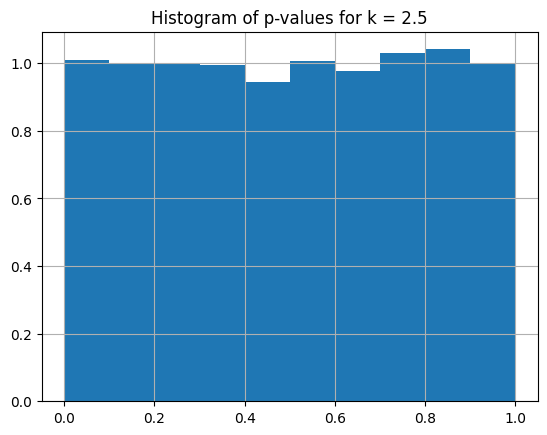

In [13]:
p = []
for i in range(10000):
    vals = getPar(2.5)
    p.append(stats.kstest(vals, cdf = (lambda x: 1 - (1 + x)**(-2.5)))[1])

plt.figure()
plt.hist(p, density = True)
plt.grid()
plt.title(f'Histogram of p-values for k = {2.5}')
plt.show()

<h3> (2) Pareto Distribution: Mean and Variance analysis</h3>

The following code was used in order to generate values from the Pareto distribution, playing
around with different values of k (assumed to be greater or equal than 2 to get a valid value for
the analytical variance), which stands for the shape parameter of the distribution. The support
for the sampled values was [β, ∞[ (we set β = 1 in the code). For each k, we computed the
analytical and empirical mean and variance, and printed the results

In [14]:
ks = np.linspace(2.001, 4, 6)
beta = 1.
size = 100000

for k in ks:
    us = np.random.uniform(0, 1, size)
    vals = beta*(us**(-1/k))
    E = beta * k / (k - 1)
    V = beta**2 * k /(k-1)**2/(k-2)
    sample_E = np.mean(vals)
    sample_V = np.std(vals)**2
    print('-----------------\nk = {:.3f}'.format(k))
    print('analytical mean = {:.4f}'.format(E))
    print('empirical mean = {:.4f}'.format(sample_E))
    print('analytical variance = {:.4f}'.format(V))
    print('empirical variance = {:.4f}'.format(sample_V))


#problem when k approaches 2, the sample variance and the analytical
#variance diverge

-----------------
k = 2.001
analytical mean = 1.9990
empirical mean = 2.0132
analytical variance = 1997.0040
empirical variance = 19.8526
-----------------
k = 2.401
analytical mean = 1.7139
empirical mean = 1.7186
analytical variance = 3.0526
empirical variance = 3.6368
-----------------
k = 2.801
analytical mean = 1.5554
empirical mean = 1.5583
analytical variance = 1.0789
empirical variance = 1.3583
-----------------
k = 3.200
analytical mean = 1.4545
empirical mean = 1.4554
analytical variance = 0.5506
empirical variance = 0.5870
-----------------
k = 3.600
analytical mean = 1.3846
empirical mean = 1.3831
analytical variance = 0.3328
empirical variance = 0.3206
-----------------
k = 4.000
analytical mean = 1.3333
empirical mean = 1.3345
analytical variance = 0.2222
empirical variance = 0.2636


During the experiments with k > 2, we noted some problems with the estimation of the variance, while the
estimation of the mean has been proven accurate and stable, given a reasonably large sample
size. More in detail, we noticed how for values of k approaching to 2, the analytical variance
becomes larger and larger, going to infinity at limit. This behavior is not captured by the
empirical value, which is limited by the sample size, thus providing an underestimation
of the true variance. Having larger sample size could help in estimating more accurately the
parameters, but always being aware that for extreme values of k the results might be wrong, since we might need an enormuous amount of samples.

The same reasoning could be applied when we let k be close to 1 and comparing empirical
mean and the analytical mean. Note that, in this case, the analytical variance is not defined

In [15]:
k = 1.05
beta = 1
us = np.random.uniform(0, 1, size)
vals = beta*(us**(-1/k))
E = beta * k / (k - 1)
sample_E = np.mean(vals)
print('analytical mean = {:.4f}'.format(E))
print('empirical mean = {:.4f}'.format(sample_E))

analytical mean = 21.0000
empirical mean = 10.2306


These results are due to the shape of the Pareto Distribution, which has a long right tail.

<h3> (3) Confidence intervals for the Normal Distribution </h3>

We generated one hundred Confidence Intervals with confidence level equal to 95%, each one
based on ten observations from the normal distribution.

In [16]:
from scipy.stats import t
n = 10
ci = np.zeros((100,4))
CL = 0.95 # confidence level
DF = n-1 # degrees of freedom
z = np.abs(t.ppf((1-CL)/2,DF ) )
for i in range(100):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    x1 = np.sqrt(-2*np.log(u1) ) * np.cos(2*np.pi*u2)
    m = np.mean(x1) 
    s = np.std(x1)
    pm = z * s/np.sqrt(n)
    ci[i,:] = [m+pm, m-pm,m,s]


We print some interesting results for the run

In [17]:
# compute how many confidence intervals do not contain the true mean
not_covered = np.sum(np.logical_or(ci[:100,0] < 0, ci[:100,1] > 0))
print('Number of Confidence intervals that do not cover the true parameter: ', not_covered)
      
# compute the average width of the confidence interval
avg_width = np.mean(np.array(ci[:100,0]-np.array(ci[:100,1])))
print('average width of the confidence intervals: ', avg_width)

Number of Confidence intervals that do not cover the true parameter:  7
average width of the confidence intervals:  1.2834223738697108


The generated Confidence Intervals are then plotted to get a visual result

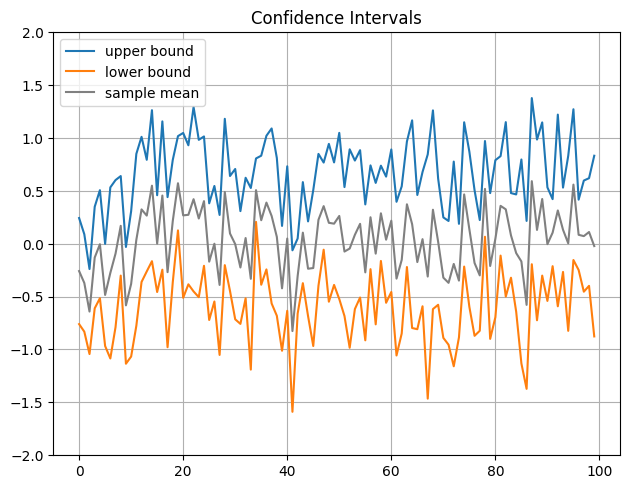

In [18]:
plt.plot(ci[:100,0], label = 'upper bound')
plt.plot(ci[:100,1], label = 'lower bound')
plt.plot(ci[:100,2], color="gray", label = 'sample mean')
plt.grid()
plt.legend()
plt.tight_layout()
plt.title('Confidence Intervals')
plt.ylim(-2,2)
plt.show()

Given the confidence level, we expect that 95 out of the 100 generated confidence intervals
capture the true mean of the standard normal distribution, i.e. the interval contains the value
0. This fact is respected by our experiments, even if we observed some variability in
the results, as one could expect by observing that each confidence interval is based only on
ten generated observations. This uncertainty is also highlighted by the average width of the
confidence intervals: trying to have a larger sample size, we observed more robust results with less variability and much thinner confidence
intervals

<h3> (4) Pareto Distribution using Composition </h3>

The following code is able to generate simulated values from the Pareto Distribution
using composition, as presented in the lecture slides. The results are then plotted noting that using composition we have simulated the Pareto
distribution with parameters β = 1 and k = 1.

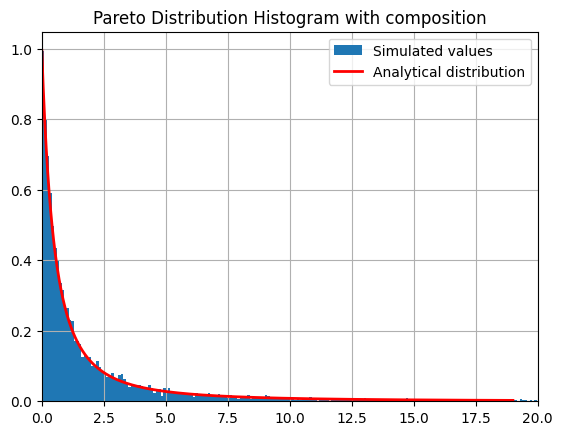

In [19]:
mu = 1.
vals = []
for i in range(10000):
    u1= np.random.uniform(0,1)
    y = -np.log(u1)/mu
    u2 = np.random.uniform(0,1)
    vals.append(-np.log(u2)/y)

vals = np.array(vals)
vals = vals[vals < 20]
x = np.linspace(0,20,1000)
plt.hist(vals, bins = 200, density = True, label = 'Simulated values')
plt.xlim([0,20])
plt.plot(x-1, stats.pareto.pdf(x, 1), color = 'red', linewidth = '2', label = 'Analytical distribution')
plt.legend()
plt.grid()
plt.title('Pareto Distribution Histogram with composition')
plt.show()
